In [1]:
import pandas as pd
import numpy as np                          #Importing necessary liabraries
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier

In [2]:
rows=[]
with open("salary,satisfaction.csv",errors='ignore') as my_file:  #importing dataset which is in csv format
    for row in csv.reader(my_file):
        rows.append(row)

In [3]:
df=pd.DataFrame(rows)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,73,74,75,76,77,78,79,80,81,82
0,id,Target_Salary,Target_Satisfied,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,...,homeaddress,latitude,longitude,PHONE,officeaddress,website,dateAdded,previousaddress,phones,CrimeTime
1,68407277,42405,0,"$3,600.00",Account Manager,CONTRACT REVIEWER (OFFICE OF L,Strategy & Analytics,Division of Economic & Financial Opportunity (...,1.\tA baccalaureate degree from an accredited ...,â€¢\tExcellent interpersonal and organizationa...,...,"346 W Magnolia Ave Auburn, AL 36832 US",32.60681297,-85.48732833,(91) 555 22 82,"PO Box 4653, Stockton, California, 95204",http://www.valleybrew.com/,2016-04-22T02:47:48Z,1045 San Pablo Ave,(510) 528-2375,23:30:00
2,68355089,60740,1,"$24,700.00","EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,Tech Talent Pipeline,The New York City Department of Small Business...,1. A baccalaureate degree from an accredited c...,,...,"300 20th St S Birmingham, AL 35233 US",33.5097215,-86.80275567,,"157 Adams St., Stockton, California, 95204",http://www.valleybrew.com/,2016-04-22T02:47:48Z,1045 San Pablo Ave,(510) 528-2375,23:00:00
3,68341763,51907.68,0,"$20,000.00",Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,Management Services Department,"Under direct supervision, assist in the routin...",1. Three years of full-time satisfactory exper...,1. A High School Diploma or GED. 2. CDL Dri...,...,"3220 Morrow Rd Birmingham, AL 35235 US",33.59558141,-86.64743685,,"1950 W Freemont, Stockton, California, 95203",http://www.valleybrew.com/,2016-04-22T02:47:48Z,1045 San Pablo Ave,(510) 528-2375,22:53:00
4,66310712,51907.68,0,"$35,000.00",Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,Management Services Department,"Under direct supervision, assist in the routin...",1. Three years of full-time satisfactory exper...,1. A High School Diploma or GED. 2. CDL Dri...,...,"4719 Highway 280 Birmingham, AL 35242 US",33.42258215,-86.69827947,2125557818,"102 S. State St., Ukiah, California, 95482",http://www.ukiahbrewingco.com/,2016-04-22T02:47:48Z,1045 San Pablo Ave,(510) 528-2375,22:50:00


In [4]:
df=df.rename(columns=df.loc[0])      

In [5]:
df.head()

,id,Target_Salary,Target_Satisfied,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,...,homeaddress,latitude,longitude,PHONE,officeaddress,website,dateAdded,previousaddress,phones,CrimeTime
0,id,Target_Salary,Target_Satisfied,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,...,homeaddress,latitude,longitude,PHONE,officeaddress,website,dateAdded,previousaddress,phones,CrimeTime
1,68407277,42405,0,"$3,600.00",Account Manager,CONTRACT REVIEWER (OFFICE OF L,Strategy & Analytics,Division of Economic & Financial Opportunity (...,1.\tA baccalaureate degree from an accredited ...,â€¢\tExcellent interpersonal and organizationa...,...,"346 W Magnolia Ave Auburn, AL 36832 US",32.60681297,-85.48732833,(91) 555 22 82,"PO Box 4653, Stockton, California, 95204",http://www.valleybrew.com/,2016-04-22T02:47:48Z,1045 San Pablo Ave,(510) 528-2375,23:30:00
2,68355089,60740,1,"$24,700.00","EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,Tech Talent Pipeline,The New York City Department of Small Business...,1. A baccalaureate degree from an accredited c...,,...,"300 20th St S Birmingham, AL 35233 US",33.5097215,-86.80275567,,"157 Adams St., Stockton, California, 95204",http://www.valleybrew.com/,2016-04-22T02:47:48Z,1045 San Pablo Ave,(510) 528-2375,23:00:00
3,68341763,51907.68,0,"$20,000.00",Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,Management Services Department,"Under direct supervision, assist in the routin...",1. Three years of full-time satisfactory exper...,1. A High School Diploma or GED. 2. CDL Dri...,...,"3220 Morrow Rd Birmingham, AL 35235 US",33.59558141,-86.64743685,,"1950 W Freemont, Stockton, California, 95203",http://www.valleybrew.com/,2016-04-22T02:47:48Z,1045 San Pablo Ave,(510) 528-2375,22:53:00
4,66310712,51907.68,0,"$35,000.00",Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,Management Services Department,"Under direct supervision, assist in the routin...",1. Three years of full-time satisfactory exper...,1. A High School Diploma or GED. 2. CDL Dri...,...,"4719 Highway 280 Birmingham, AL 35242 US",33.42258215,-86.69827947,2125557818,"102 S. State St., Ukiah, California, 95482",http://www.ukiahbrewingco.com/,2016-04-22T02:47:48Z,1045 San Pablo Ave,(510) 528-2375,22:50:00


In [6]:
df.drop(index=df.head(1).index,inplace=True)

In [7]:
df.head()

,id,Target_Salary,Target_Satisfied,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,...,homeaddress,latitude,longitude,PHONE,officeaddress,website,dateAdded,previousaddress,phones,CrimeTime
1,68407277,42405,0,"$3,600.00",Account Manager,CONTRACT REVIEWER (OFFICE OF L,Strategy & Analytics,Division of Economic & Financial Opportunity (...,1.\tA baccalaureate degree from an accredited ...,â€¢\tExcellent interpersonal and organizationa...,...,"346 W Magnolia Ave Auburn, AL 36832 US",32.60681297,-85.48732833,(91) 555 22 82,"PO Box 4653, Stockton, California, 95204",http://www.valleybrew.com/,2016-04-22T02:47:48Z,1045 San Pablo Ave,(510) 528-2375,23:30:00
2,68355089,60740,1,"$24,700.00","EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,Tech Talent Pipeline,The New York City Department of Small Business...,1. A baccalaureate degree from an accredited c...,,...,"300 20th St S Birmingham, AL 35233 US",33.5097215,-86.80275567,,"157 Adams St., Stockton, California, 95204",http://www.valleybrew.com/,2016-04-22T02:47:48Z,1045 San Pablo Ave,(510) 528-2375,23:00:00
3,68341763,51907.68,0,"$20,000.00",Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,Management Services Department,"Under direct supervision, assist in the routin...",1. Three years of full-time satisfactory exper...,1. A High School Diploma or GED. 2. CDL Dri...,...,"3220 Morrow Rd Birmingham, AL 35235 US",33.59558141,-86.64743685,,"1950 W Freemont, Stockton, California, 95203",http://www.valleybrew.com/,2016-04-22T02:47:48Z,1045 San Pablo Ave,(510) 528-2375,22:53:00
4,66310712,51907.68,0,"$35,000.00",Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,Management Services Department,"Under direct supervision, assist in the routin...",1. Three years of full-time satisfactory exper...,1. A High School Diploma or GED. 2. CDL Dri...,...,"4719 Highway 280 Birmingham, AL 35242 US",33.42258215,-86.69827947,2125557818,"102 S. State St., Ukiah, California, 95482",http://www.ukiahbrewingco.com/,2016-04-22T02:47:48Z,1045 San Pablo Ave,(510) 528-2375,22:50:00
5,68476807,35,1,"$10,400.00",Temporary Painter,PAINTER,Dept of Management & Planning,Responsibilities of selected candidates will i...,1. Five years of full-time satisfactory experi...,,...,"1821 Cherokee Ave SW Cullman, AL 35055 US",34.15413377,-86.84122008,26.47.1555,"13011 Newport Ave. #100, Tustin, California, 9...",http://www.tustinbrewery.com/,2016-04-22T02:47:48Z,1045 San Pablo Ave,(510) 528-2375,22:31:00


In [8]:
df.shape  #data contain 2946 rows and 83 columns where 2 have target columns and 81 attribute present in data

(2946, 83)

In [9]:
df.info()  #from this we see information about data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2946 entries, 1 to 2946
Data columns (total 83 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          2946 non-null   object
 1   Target_Salary               2946 non-null   object
 2   Target_Satisfied            2946 non-null   object
 3   LOAN_AMT                    2946 non-null   object
 4   Business Title              2946 non-null   object
 5   Civil Service Title         2946 non-null   object
 6   Division/Work Unit          2946 non-null   object
 7   Job Description             2946 non-null   object
 8   Minimum Qual Requirements   2946 non-null   object
 9   Preferred Skills            2946 non-null   object
 10  Additional Information      2946 non-null   object
 11  To Apply                    2946 non-null   object
 12  Hours/Shift                 2946 non-null   object
 13  Residency Requirement       2946 non-null   obje

In [10]:
df.describe()  #from descibe function I got some stastical information about data

,id,Target_Salary,Target_Satisfied,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,...,homeaddress,latitude,longitude,PHONE,officeaddress,website,dateAdded,previousaddress,phones,CrimeTime
count,2946,2946,2946,2946,2946,2946,2946,2946,2946,2946,...,2946,2946,2946,2946,2946,2946,2946,2946,2946,2946
unique,2946,519,2,492,1244,312,678,1608,337,1283,...,2630,2630,2630,25,2332,1371,37,48,46,754
top,68596708,52524,0,"$15,000.00",Assistant Civil Engineer,COMMUNITY COORDINATOR,Executive Management,The New York City Taxi and Limousine Commissio...,1. A baccalaureate degree from an accredited c...,,...,,,,,,...,2017-07-02T02:34:33Z,311 W 43rd St,(212) 776-1818,22:00:00
freq,1,82,2327,203,33,182,56,14,182,393,...,317,317,317,2231,539,557,375,375,375,70


In [11]:
df.dtypes

id                  object
Target_Salary       object
Target_Satisfied    object
LOAN_AMT            object
Business Title      object
                     ...  
website             object
dateAdded           object
previousaddress     object
phones              object
CrimeTime           object
Length: 83, dtype: object

In [12]:
#data contain all object columns need to convert it into numeric 

In [13]:
df['Target_Salary']=pd.to_numeric(df['Target_Salary'])

In [14]:
df['Target_Satisfied']=pd.to_numeric(df['Target_Satisfied'])

In [15]:
df['LOAN_AMT']=df['LOAN_AMT'].str.replace('$','')
df['LOAN_AMT']=df['LOAN_AMT'].str.replace(',','').astype(float)

In [16]:
df['dti']=pd.to_numeric(df['dti'])

In [17]:
df['last_pymnt_amnt']=pd.to_numeric(df['last_pymnt_amnt'])

In [18]:
df['latitude']=pd.to_numeric(df['latitude'])
df['longitude']=pd.to_numeric(df['longitude'])

In [19]:
df['term']=df['term'].str.replace('months','')
df['term']=df['term'].str.replace(',','').astype(int)

In [20]:
#data contain 81 attributes some attributes are not important for building ML model so i deleted unnecessary columns
df.drop(['id','homeaddress','PHONE','officeaddress','website','previousaddress','phones','CrimeTime',
         'Additional Information','your_favoritearticle_today','Posting Date','Posting Updated',
        'Process Date','UpdateCV','CommunicationTools','TimeFullyProductive','EducationTypes','AgreeDisagree2',
         'AgreeDisagree3','LanguageDesireNextYear','DatabaseDesireNextYear','PlatformDesireNextYear',
        'FrameworkDesireNextYear','Methodology','VersionControl','pymnt_plan','orignal_website_directory',
        'zip_code','earliest_cr_line','last_pymnt_d','next_pymnt_d','last_credit_pull_d',
        'Time','your_favoritearticle_today','url','Email'],axis=1,inplace=True)

In [21]:
df.shape   #now 48 columns in dataset

(2946, 48)

In [24]:
 #converting non-numeric columns into numeric using scikit learn  label encoder

from sklearn.preprocessing import LabelEncoder

for column in df.columns:
    if df[column].dtype==np.number:
        continue
    df[column]=LabelEncoder().fit_transform(df[column])     

<ipython-input-24-ca565e17ed60>:6: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype==np.number:


In [25]:
#we can see all columns are now in numeric 
df.dtypes

Target_Salary                float64
Target_Satisfied               int64
LOAN_AMT                     float64
Business Title                 int32
Civil Service Title            int32
Division/Work Unit             int32
Job Description                int32
Minimum Qual Requirements      int32
Preferred Skills               int32
To Apply                       int32
Hours/Shift                    int32
Residency Requirement          int32
FormalEducation                int32
UndergradMajor                 int32
CompanySize                    int32
DevType                        int32
YearsCoding                    int32
YearsCodingProf                int32
HopeFiveYears                  int32
JobSearchStatus                int32
LastNewJob                     int32
SelfTaughtTypes                int32
TimeAfterBootcamp              int32
HackathonReasons               int32
AgreeDisagree1                 int32
LanguageWorkedWith             int32
DatabaseWorkedWith             int32
P

In [27]:
#checking for missing values in data
df.isnull().sum()

Target_Salary                  0
Target_Satisfied               0
LOAN_AMT                       0
Business Title                 0
Civil Service Title            0
Division/Work Unit             0
Job Description                0
Minimum Qual Requirements      0
Preferred Skills               0
To Apply                       0
Hours/Shift                    0
Residency Requirement          0
FormalEducation                0
UndergradMajor                 0
CompanySize                    0
DevType                        0
YearsCoding                    0
YearsCodingProf                0
HopeFiveYears                  0
JobSearchStatus                0
LastNewJob                     0
SelfTaughtTypes                0
TimeAfterBootcamp              0
HackathonReasons               0
AgreeDisagree1                 0
LanguageWorkedWith             0
DatabaseWorkedWith             0
PlatformWorkedWith             0
FrameworkWorkedWith            0
IDE                            0
OperatingS

In [28]:
#filling missing values
df['latitude']=df['latitude'].fillna(df['latitude'].mean())
df['longitude']=df['longitude'].fillna(df['longitude'].mean())

In [29]:
#defining label and features for target salary problem 
x=df.drop(['Target_Salary'],axis=1)
y=df['Target_Salary']

C:\Users\Komal\anaconda3\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

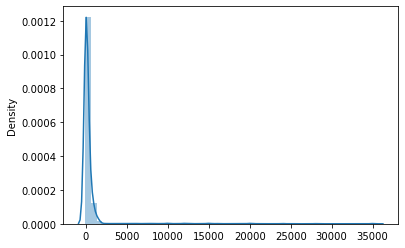

In [30]:
sns.distplot(x)   #data is positive skewed

In [31]:
#data is converted standard scaling
sc=StandardScaler()
scaled_data=sc.fit_transform(x)    

C:\Users\Komal\anaconda3\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

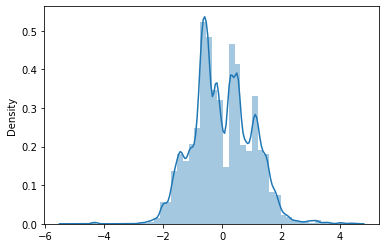

In [33]:
#now data is converted nearly normal distribution
sns.distplot(scaled_data)

# ___Regression Promblem for  Target Salary

In [141]:
#data is splited into train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaled_data,y,test_size=0.20,random_state=43)

In [142]:
#randon forest model is intialize
model=RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [143]:
#accuracy score of random forest regressor
model.score(x_test,y_test)

0.6716176782768373

In [144]:
y_pred=model.predict(x_test)

In [145]:
#calculate rmse for model
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print('Root Mean Squared Error',rmse)

Root Mean Squared Error 122.94085575326493


# Root Mean Squared Error 122.94085575326493

# _____Classification problem for Target satisfied

In [68]:
#creating xlabel and feature for target satisfied
x1=df.drop(['Target_Satisfied'],axis=1)
y1=df['Target_Satisfied']

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.20,random_state=42)

In [70]:
model1=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=42)
model1.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [71]:
model1.score(x_test,y_test)

0.7949152542372881

In [72]:
y_preds=model1.predict(x_test)

In [73]:
from sklearn.metrics import classification_report

cr=classification_report(y_test,y_preds)
print(cr)

              precision    recall  f1-score   support

           0       0.81      0.98      0.89       478
           1       0.15      0.02      0.03       112

    accuracy                           0.79       590
   macro avg       0.48      0.50      0.46       590
weighted avg       0.68      0.79      0.72       590



# Weighted F1 = 0.72